### Data Visualization

#### `matplotlib` - from the documentation:
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

`matplotlib.pyplot` is a collection of command style functions <br>
Each pyplot function makes some change to a figure <br>
`matplotlib.pyplot` preserves ststes across function calls


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Call signatures::
```
    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

Quick plot

The main usage of `plt` is the `plot()` and `show()` functions

https://matplotlib.org/3.1.1/api/pyplot_summary.html <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html <br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html<br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html<br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html<br>
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html<br>


In [2]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
colors = {'setosa':'red', 'versicolor':'orange', 'virginica':'blue'}
def get_col(spec):
    return colors[spec]
colors_col = df_iris.species.apply(get_col)
print(colors_col)

0       red
1       red
2       red
3       red
4       red
5       red
6       red
7       red
8       red
9       red
10      red
11      red
12      red
13      red
14      red
15      red
16      red
17      red
18      red
19      red
20      red
21      red
22      red
23      red
24      red
25      red
26      red
27      red
28      red
29      red
       ... 
120    blue
121    blue
122    blue
123    blue
124    blue
125    blue
126    blue
127    blue
128    blue
129    blue
130    blue
131    blue
132    blue
133    blue
134    blue
135    blue
136    blue
137    blue
138    blue
139    blue
140    blue
141    blue
142    blue
143    blue
144    blue
145    blue
146    blue
147    blue
148    blue
149    blue
Name: species, Length: 150, dtype: object


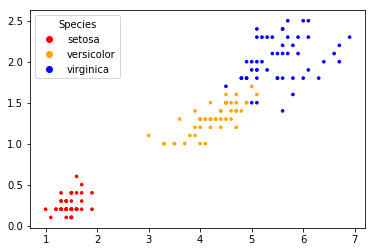

In [4]:
plt.scatter("petal_length","petal_width", data=df_iris, c = colors_col, s = 7, marker = "o")

legend_elements = [plt.Line2D([0], [0], marker='o', linestyle="", color=colors["setosa"], label="setosa"),
                   plt.Line2D([0], [0], marker='o', linestyle="", color=colors["versicolor"], label="versicolor"),
                   plt.Line2D([0], [0], marker='o', linestyle="", color=colors["virginica"], label="virginica")]

plt.legend(handles=legend_elements,loc="upper left", title="Species")
plt.show()

https://python-graph-gallery.com/matplotlib/

#### Using pandas `.plot()`

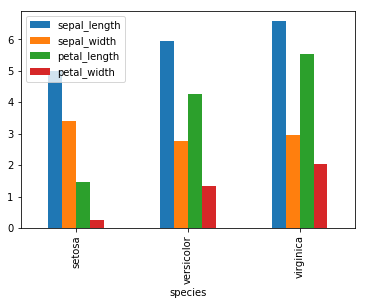

In [5]:
df_iris.groupby("species").mean().plot(kind='bar')
plt.show()

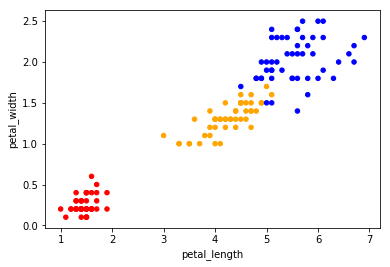

In [6]:
df_iris.plot(x= "petal_length", y = "petal_width" ,kind = "scatter", color = colors_col)
plt.savefig('output1.png')

https://github.com/pandas-dev/pandas/blob/v0.25.0/pandas/plotting/_core.py#L504-L1533

https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png

<img src = "https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png" width = "1000"/>

### `seaborn` - dataset-oriented plotting

Seaborn is a library that specializes in making *prettier* `matplotlib` plots of statistical data. <br>
It is built on top of matplotlib and closely integrated with pandas data structures.

https://seaborn.pydata.org/introduction.html<br>
https://python-graph-gallery.com/seaborn/

In [7]:
import seaborn as sns

`seaborn` lets users *style* their plotting environment.<br>
There are 5 preset themes: darkgrid (default), whitegrid, dark, white, and ticks.<br>
https://seaborn.pydata.org/tutorial/aesthetics.html

However, you can always use `matplotlib`'s `plt.style`
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [8]:
sns.set(style='whitegrid')

In [11]:
#dir(sns)

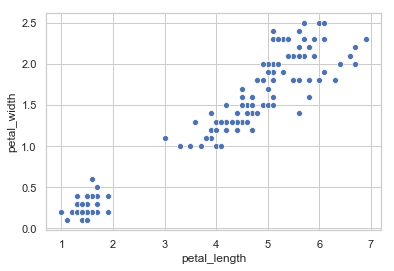

In [9]:
sns.scatterplot(x='petal_length',y='petal_width',data=df_iris)
plt.show()

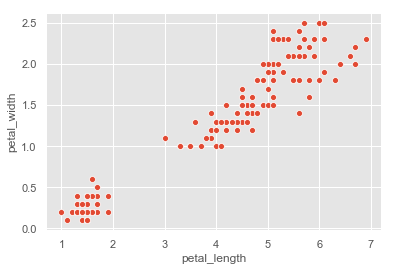

In [12]:
with plt.style.context(('ggplot')):
    sns.scatterplot(x='petal_length',y='petal_width',data=df_iris)
plt.show()

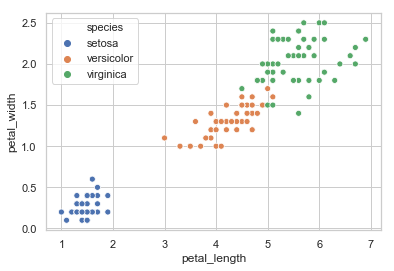

In [13]:
sns.scatterplot(x='petal_length',y='petal_width', hue = "species",data=df_iris)
plt.show()

#### Violin plot

Fancier box plot that gets rid of the need for 'jitter' to show the inherent distribution of the data points

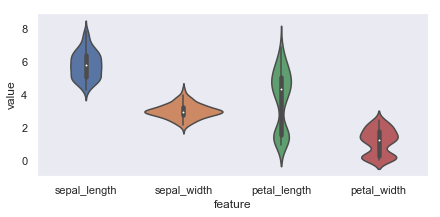

In [14]:
sns.set(style="dark")
fig, axes = plt.subplots(figsize=(7, 3))
sns.violinplot(data=df_iris, ax=axes)
axes.set_ylabel('value')
axes.set_xlabel('feature')
plt.show()

#### Distplot

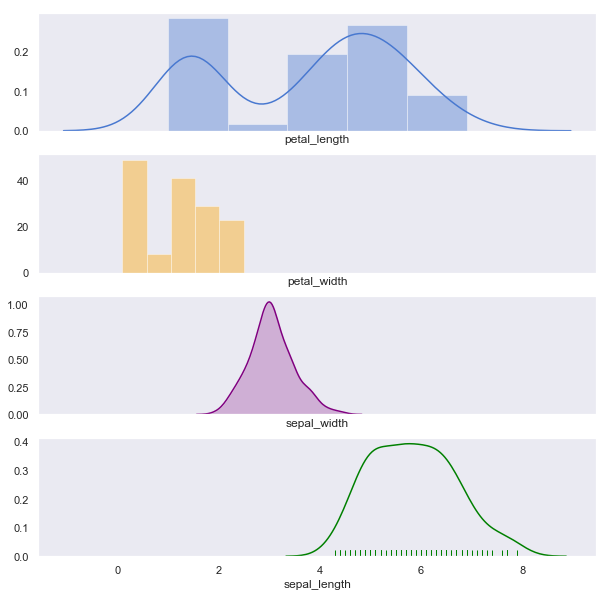

In [15]:
sns.set(style='dark', palette='muted')

# 1 column, 4 rows
f, axes = plt.subplots(4,1, figsize=(10,10), sharex=True)

# Regular displot
sns.distplot(df_iris.petal_length, ax=axes[0])

# Change the color
sns.distplot(df_iris.petal_width, kde=False, ax=axes[1], color='orange')

# Show the Kernel density estimate
sns.distplot(df_iris.sepal_width, hist=False, kde_kws={'shade':True}, ax=axes[2], color='purple')

# Show the rug
sns.distplot(df_iris.sepal_length, hist=False, rug=True, ax=axes[3], color='green')
plt.show()

#### FacetGrid

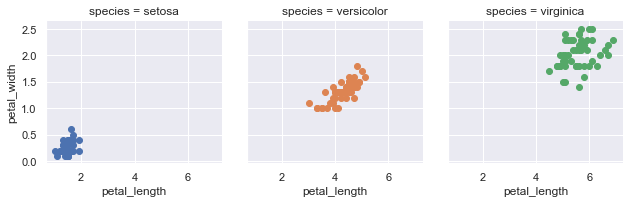

In [16]:
sns.set()
columns = ['species', 'petal_length', 'petal_width']
facet_column = 'species'
g = sns.FacetGrid(df_iris.loc[:,columns], col=facet_column, hue=facet_column)
g.map(plt.scatter, 'petal_length', 'petal_width')

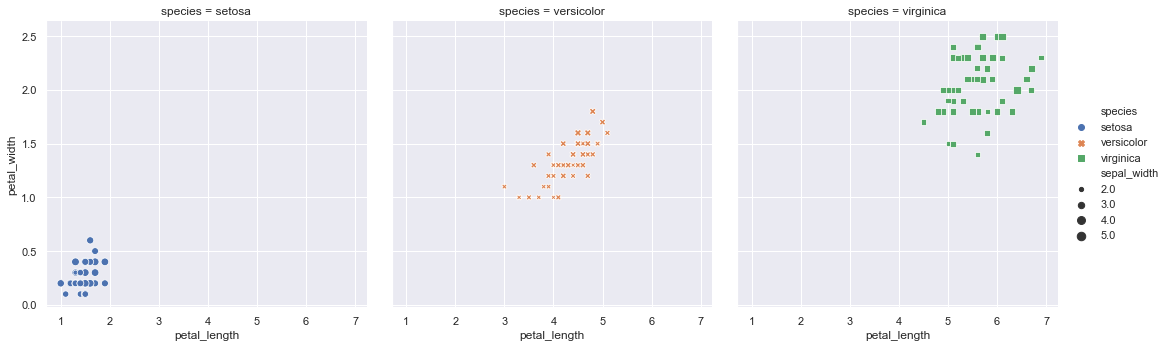

In [17]:
sns.relplot(x="petal_length", y="petal_width", col="species",
            hue="species", style="species", size="sepal_width",
            data=df_iris)
plt.show()

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

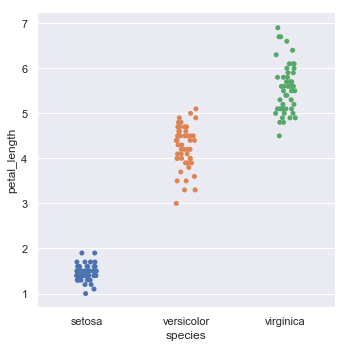

In [18]:
sns.catplot(x="species", y="petal_length", data=df_iris)
plt.show()

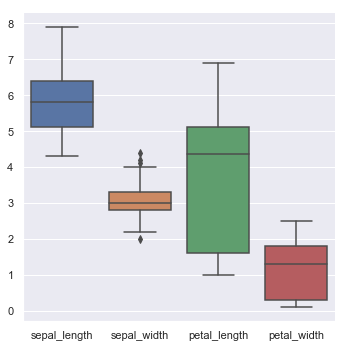

In [19]:
sns.catplot(kind="box", data=df_iris)
plt.show()

In [20]:
# https://seaborn.pydata.org/tutorial/categorical.html
tips = sns.load_dataset("tips")
print(tips.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


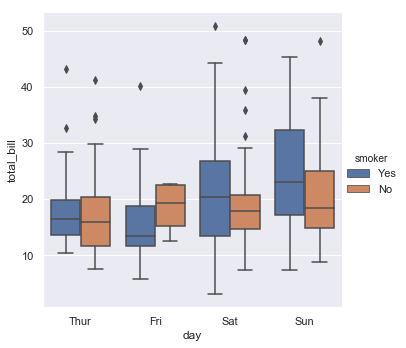

In [21]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

Plot the tips by day with two side by side box plots for males and females and different subplots for the time of the meal (lunch/dinner). 




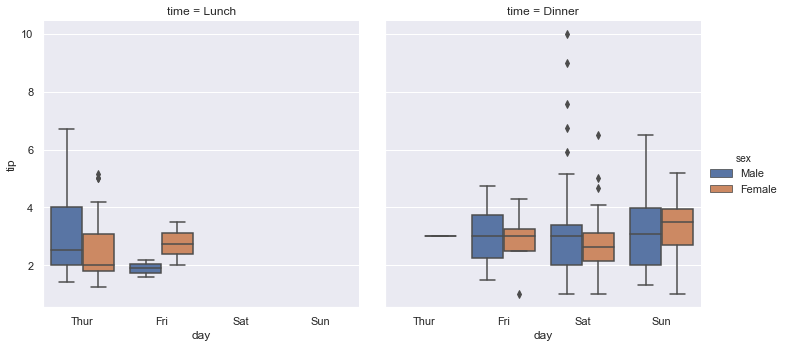

In [26]:
sns.catplot(x="day", y="tip", hue="sex", kind="box", col="time", data=tips)



In [29]:
# help(sns.catplot)

In [31]:
#dir(sns)

In [32]:
help(sns.dogplot)

Help on function dogplot in module seaborn.miscplot:

dogplot()
    Who's a good boy?



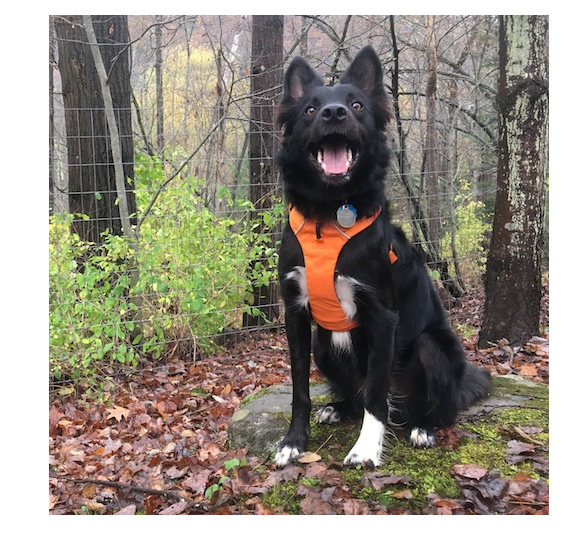

In [33]:
sns.dogplot()

# plots tried

tips over time ctplot <br>
boxen plot tips over time <br>
swarmplot tips over day <br>
violinplot tips over time <br>
bar tips over time <br>
day time bar plot col - sex smoking  <br>
count plot petal_length  <br>
boxen plot price per sex and per meal  <br>
size by tip swarm  <br>
scatterplot total bil by tips  <br>
pointplot tips over total bil  <br>
relplot smoker tips  <br>
violin plot tips over day  <br>
violin plot tips over total_bill by size <br>
swarmplot tips per day hue=sex <br>

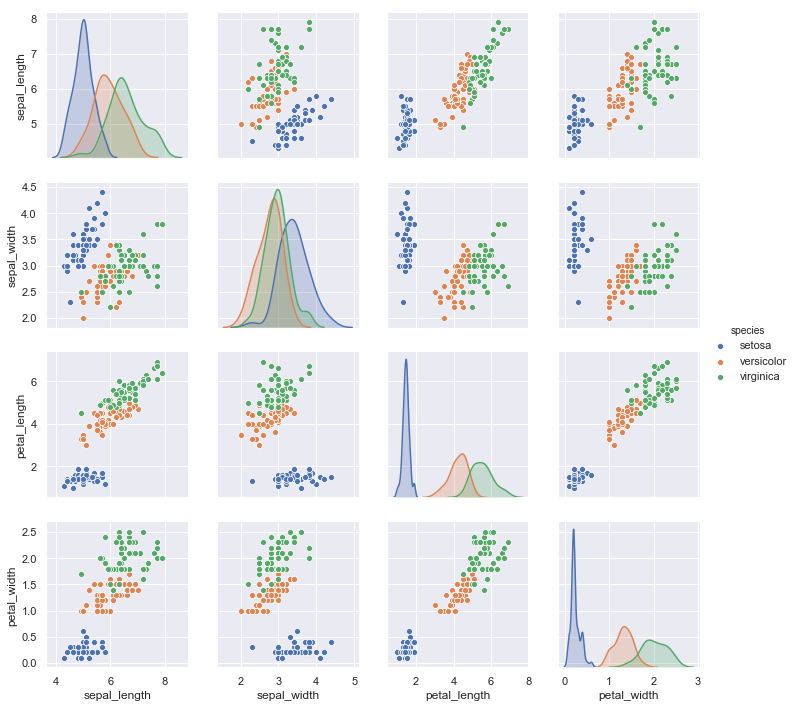

In [34]:
sns.pairplot(df_iris, hue='species', height=2.5);


https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf" width = "1000"/>

### `plotnine` - R ggplot2 in python

plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots are easy to think about and then create, while the simple plots remain simple.



In [51]:
#!conda install -c conda-forge plotnine

In [36]:
#!conda install -y -c conda-forge plotnine

https://plotnine.readthedocs.io/en/stable/

In [35]:
from plotnine import *

In [38]:
#dir()

https://plotnine.readthedocs.io/en/stable/api.html

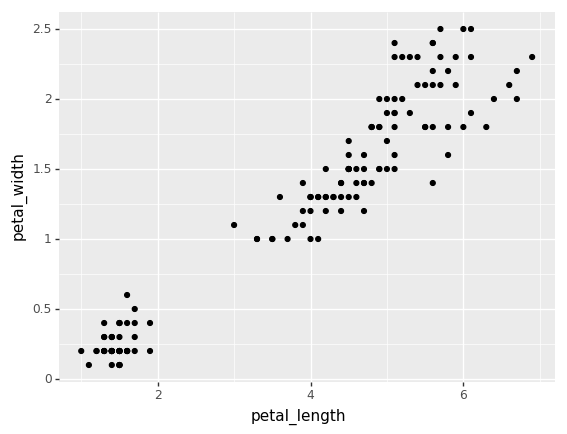

<ggplot: (7543842031)>

In [40]:
p = ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point()
p

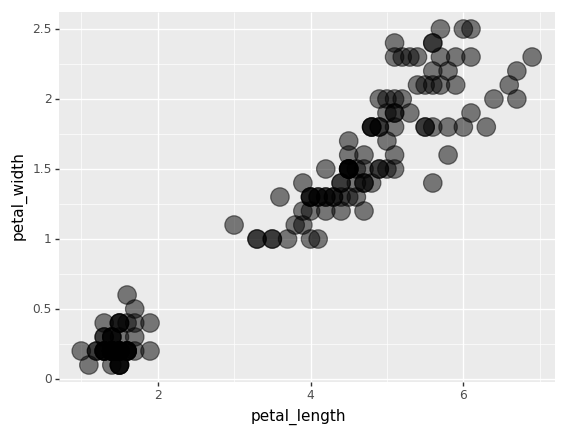

<ggplot: (7544178422)>

In [41]:
# add transparency - to address overlapping points
ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point(size = 7, alpha=0.5)

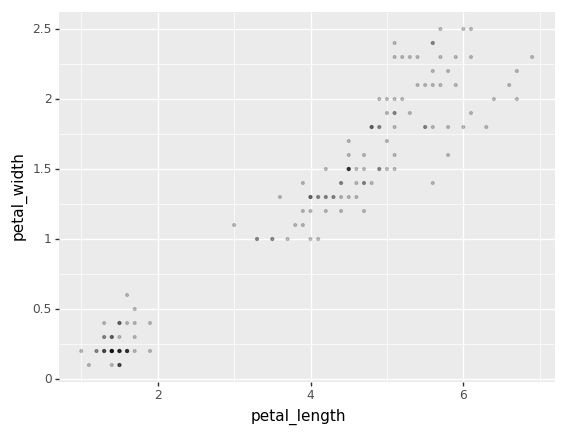

<ggplot: (-9223372029310221582)>

In [43]:
# change point size 
ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point(size = 0.7, alpha=0.2)

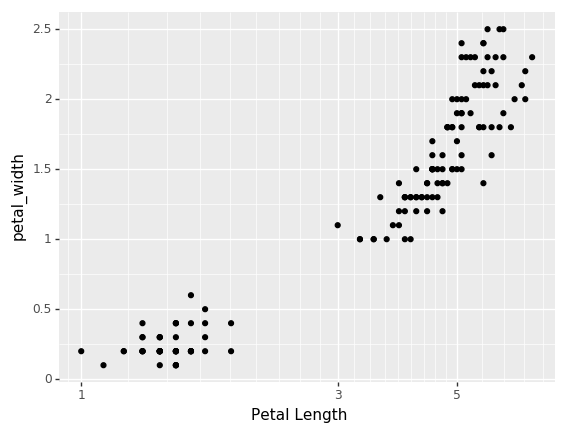

<ggplot: (7544754345)>

In [45]:
# more parameters 
p = ggplot(data=df_iris) + aes(x="petal_length", y = "petal_width") + geom_point() + scale_x_log10() + xlab("Petal Length")
p

In [47]:
dir(p)

['__add__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rrshift__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_theme',
 '_build',
 '_create_figure',
 '_draw',
 '_draw_facet_labels',
 '_draw_labels',
 '_draw_layers',
 '_draw_legend',
 '_draw_title',
 '_draw_using_figure',
 '_draw_watermarks',
 '_resize_panels',
 '_save_filename',
 '_setup_parameters',
 'axs',
 'coordinates',
 'data',
 'draw',
 'environment',
 'facet',
 'figure',
 'guides',
 'labels',
 'layers',
 'layout',
 'mapping',
 'save',
 'scales',
 'theme',
 'watermarks']

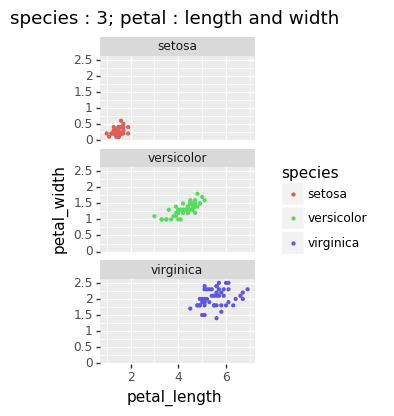

<ggplot: (-9223372029309924387)>

In [49]:
n = "3"
features = "length and width"
title = f'species : {n}; petal : {features}'
#title = 'species : {}; petal : {}'.format(n,features)


ggplot(data=df_iris) +aes(x='petal_length',y='petal_width',color="species") \
    + geom_point(size=0.7) + facet_wrap('~species',nrow=3) \
    + theme(figure_size=(2,4)) + ggtitle(title)


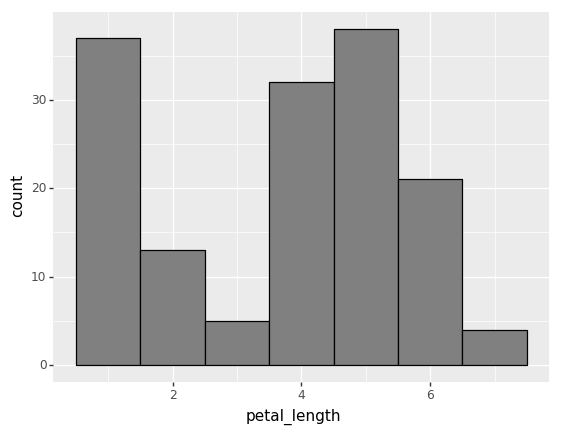

<ggplot: (-9223372029310924330)>

In [50]:
p = ggplot(data=df_iris) + aes(x='petal_length') \
    + geom_histogram(binwidth=1,color='black',fill='grey')
p

In [52]:
ggsave(plot=p, filename='hist_plot_with_plotnine.png')

/Users/mitrea/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/mitrea/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: hist_plot_with_plotnine.png
  warn('Filename: {}'.format(filename))


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


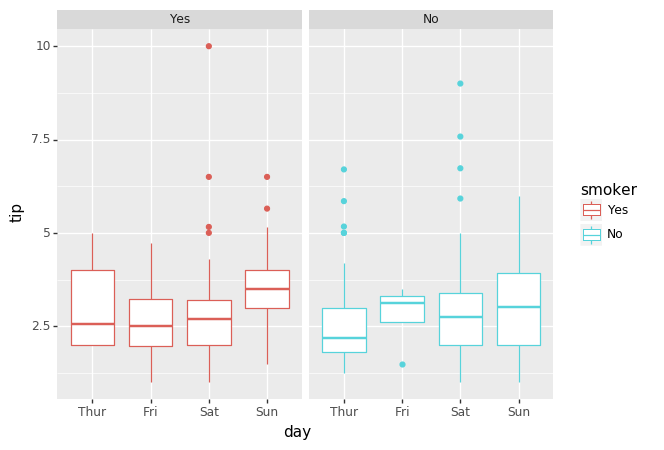

<ggplot: (7544162575)>

In [55]:
tips = sns.load_dataset("tips")
print(tips.head())

ggplot(aes(x="day", y="tip",\
           color="smoker"), data=tips) \
            + geom_boxplot()\
            + facet_grid(".~smoker")





http://cmdlinetips.com/2018/05/plotnine-a-python-library-to-use-ggplot2-in-python/ <br>
https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

<img src = "https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf" width = "1000"/>

Use ggplot to plot the sepal_length in boxplots separated by species, add new axes labels and make the y axis values log10.

* Write a function that takes as a parameter a line of the dataframe and if the species is 
** setosa it returns the petal_length
** versicolor it returns the petal_width
** virginica it returns the sepal_length

Apply this function to every line in the dataset. <br>
Use ggplot to make a histogram of the resulted values.

In [ ]:
#dir()

https://plotnine.readthedocs.io/en/stable/api.html

Look for scale functions.

In [56]:
# Added after class
def get_info(line):
    if line["species"] == "setosa":
        return line["petal_length"]
    elif line["species"] == "versicolor":
        return line["petal_width"]
    elif line["species"] == "virginica":
        return line["sepal_length"]
    else:
        print("Wrong species")
        return None

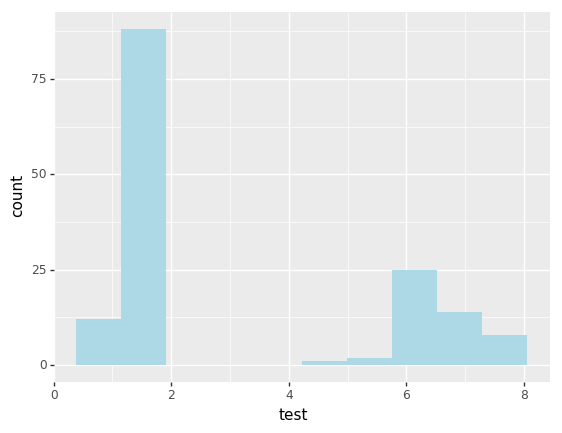

<ggplot: (7544787001)>

In [57]:
# Added after class
res = df_iris.apply(get_info, axis = 1)
df = pd.DataFrame(res, columns = ["test"])

ggplot(data=df) + aes(x="test") + geom_histogram(bins=10, fill = "lightblue")



More resources: 

https://github.com/swyder/plotnine_tutorial/blob/master/plotnine_demo_sw.ipynb <br>
https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/

#### plots tried

In [58]:
import seaborn as sns

In [60]:
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [61]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


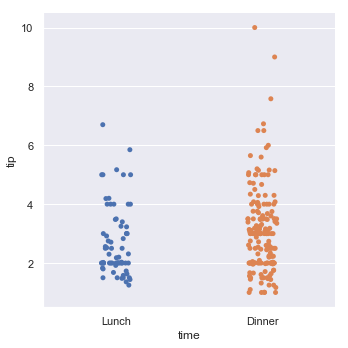

In [63]:
#Added after class
# tips over time catplot
sns.catplot(x = "time", y = "tip", data = tips)

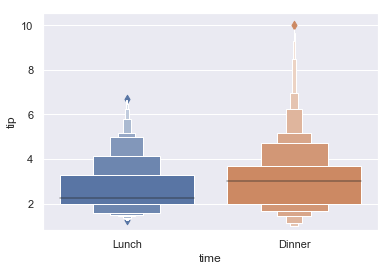

In [64]:
#Added after class
# boxen plot tips over time 
sns.boxenplot(x = "time", y = "tip", data = tips)

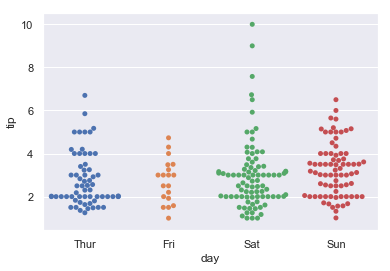

In [66]:
#Added after class
# swarmplot tips over day
sns.swarmplot(x = "day", y = "tip", data = tips)

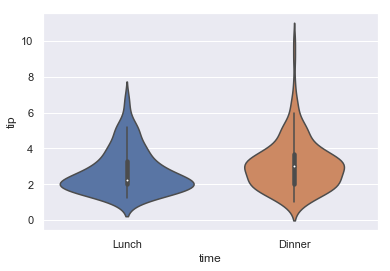

In [67]:
#Added after class
# violinplot tips over time 
sns.violinplot(x = "time", y = "tip", data = tips)

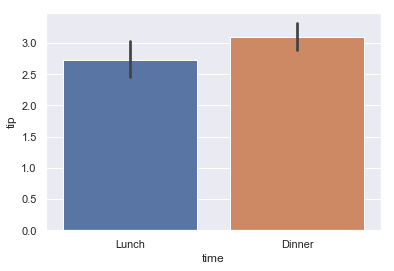

In [68]:
#Added after class
# bar tips over time 
sns.barplot(x = "time", y = "tip", data = tips)


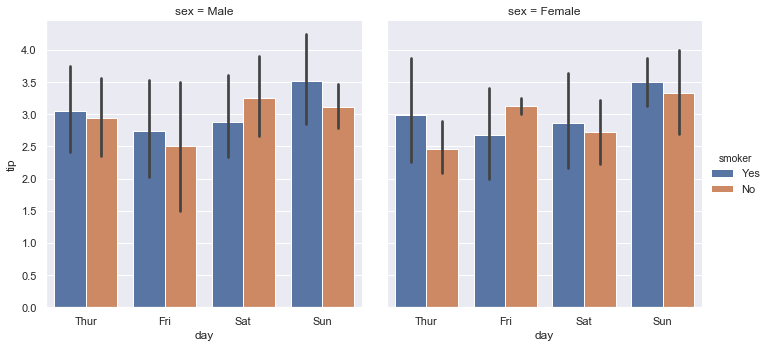

In [78]:
#Added after class
# day time bar plot col - sex smoking  
#- day and time are both non-numerical so most likely time is tips
# day tips bar plot col - sex smoking  


sns.catplot(x = "day", y = "tip", data = tips, hue = "smoker",col = "sex", kind = "bar")

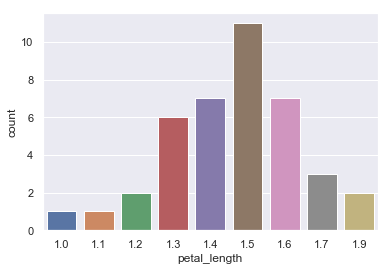

In [88]:
#Added after class
# count plot petal_length  
sns.countplot(df_iris.petal_length[10:50])

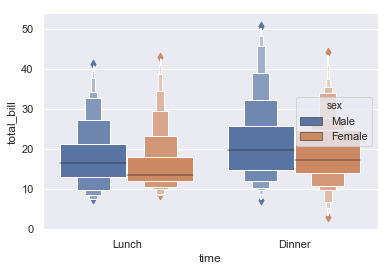

In [90]:
#Added after class
# boxen plot price per sex and per meal  <br>
sns.boxenplot(x = "time", y = "total_bill", data = tips, hue = "sex")

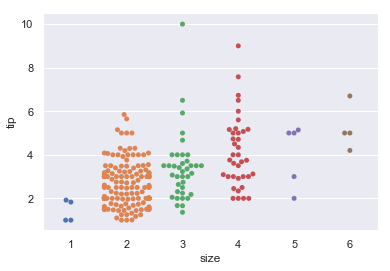

In [93]:
#Added after class
# size by tip swarm  
sns.swarmplot(x = "size", y = "tip", data = tips)



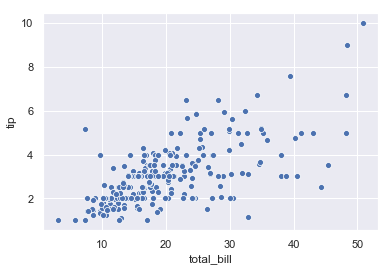

In [97]:
#Added after class
# scatterplot total bil by tips  

sns.scatterplot(x = "total_bill", y = "tip", data = tips)


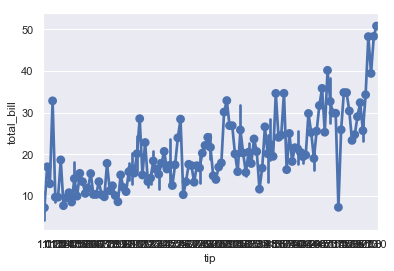

In [101]:
#Added after class
# pointplot tips over total bil  
sns.pointplot(x = "tip", y = "total_bill", data = tips)





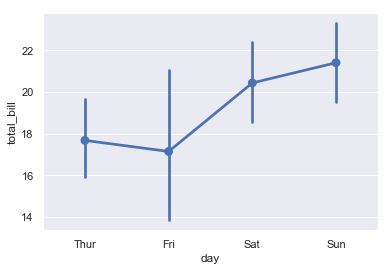

In [111]:
#maybe do
sns.pointplot(x = "day", y = "total_bill", data = tips)




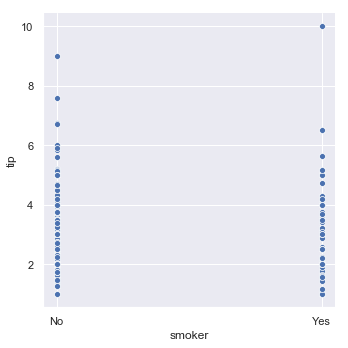

In [104]:
#Added after class
# relplot smoker tips 

sns.relplot(x = "smoker", y = "tip", data = tips)



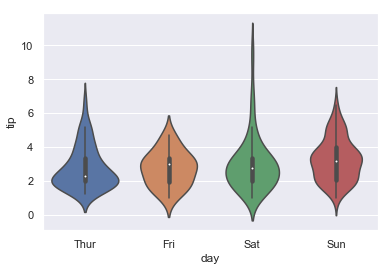

In [105]:
#Added after class
# violin plot tips over day 

sns.violinplot(x = "day", y = "tip", data = tips)



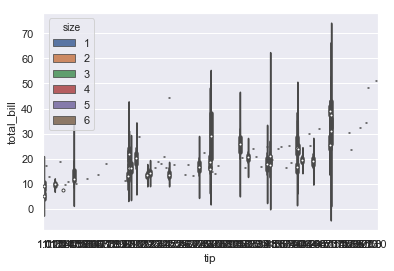

In [107]:
#Added after class
# violin plot tips over total_bill by size 
sns.violinplot(x = "tip", y = "total_bill", data = tips, hue = "size")




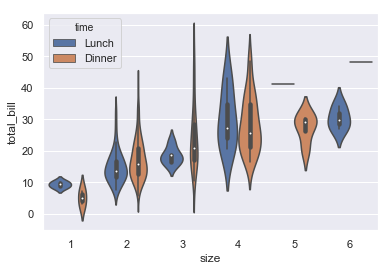

In [110]:
#maybe do

sns.violinplot(x = "size", y = "total_bill", data = tips, hue = "time")



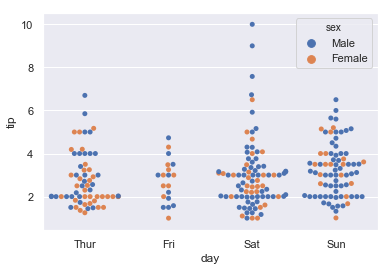

In [112]:
#Added after class
# swarmplot tips per day hue=sex 

sns.swarmplot(x = "day", y = "tip", data = tips, hue = "sex")

